In [1]:
# Gerekli paketleri indeirelim
import numpy as np
import pandas as pd
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('segmentation data.csv')

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df.describe().round(0)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,100001000.0,0.0,0.0,36.0,1.0,120954.0,1.0,1.0
std,577.0,0.0,1.0,12.0,1.0,38109.0,1.0,1.0
min,100000001.0,0.0,0.0,18.0,0.0,35832.0,0.0,0.0
25%,100000501.0,0.0,0.0,27.0,1.0,97663.0,0.0,0.0
50%,100001000.0,0.0,0.0,33.0,1.0,115548.0,1.0,1.0
75%,100001500.0,1.0,1.0,42.0,1.0,138072.0,1.0,1.0
max,100002000.0,1.0,1.0,76.0,3.0,309364.0,2.0,2.0


In [7]:
X = df.drop(['ID'], axis=1)

Education'daki bilinmeyen girişleri kaldıralim

In [8]:
X['Education'] = X['Education'].map({0:np.nan,1:1,2:2,3:3})
X.isna().sum()

Sex                  0
Marital status       0
Age                  0
Education          287
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [9]:
X.dropna(axis=0, inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

Elbow methos yöntemiyle mevcut küme sayısını tahmin edelim

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = []
s_scores = []
for i in range(2,15):    
    model = KMeans(n_clusters = i)
    model.fit(X_transformed)
    scores.append(model.inertia_)
    labels = model.labels_
    s_scores.append(silhouette_score(X_transformed,labels))

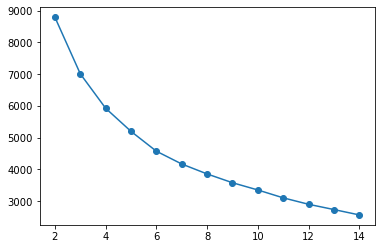

In [12]:
plt.plot(range(2,15),scores,marker='o')

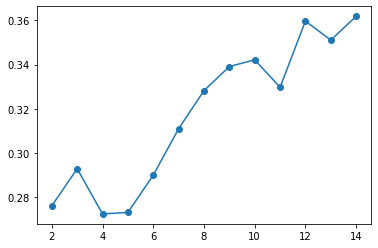

In [13]:
plt.plot(range(2,15),s_scores,marker='o')

Continue with 5 clusters

In [14]:
model = KMeans(n_clusters = 5,random_state=0)
model.fit(X_transformed)

labels = model.labels_
centers = scaler.inverse_transform(model.cluster_centers_)
print(centers)

[[ 8.32618026e-01  1.00000000e+00  3.01738197e+01  1.10515021e+00
   9.69778262e+04  4.05579399e-01  4.29184549e-03]
 [ 6.55367232e-01  9.83050847e-01  2.80112994e+01  1.00000000e+00
   1.27178599e+05  1.13276836e+00  1.29943503e+00]
 [ 4.12307692e-01 -1.22124533e-15  3.95846154e+01  1.07692308e+00
   1.01896117e+05  3.26153846e-01  6.15384615e-02]
 [ 4.98023715e-01  7.07509881e-01  5.56521739e+01  2.14229249e+00
   1.58894257e+05  1.15810277e+00  1.14229249e+00]
 [ 6.34920635e-03 -1.88737914e-15  4.13650794e+01  1.00000000e+00
   1.43983762e+05  1.30158730e+00  1.49841270e+00]]


In [15]:
for i, col in enumerate(X.columns):
    print(col, round(centers[0,i],2), round(centers[1,i],2), round(centers[2,i],2),\
          round(centers[3,i],2), round(centers[4,i],2))

Sex 0.83 0.66 0.41 0.5 0.01
Marital status 1.0 0.98 -0.0 0.71 -0.0
Age 30.17 28.01 39.58 55.65 41.37
Education 1.11 1.0 1.08 2.14 1.0
Income 96977.83 127178.6 101896.12 158894.26 143983.76
Occupation 0.41 1.13 0.33 1.16 1.3
Settlement size 0.0 1.3 0.06 1.14 1.5


In [16]:
cluster_data = pd.DataFrame()
for i, col in enumerate(X.columns):
    data = centers[:,i]
    cluster_data[col] = data
cluster_data = cluster_data.round(decimals=1)

In [17]:
cluster_data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.8,1.0,30.2,1.1,96977.8,0.4,0.0
1,0.7,1.0,28.0,1.0,127178.6,1.1,1.3
2,0.4,-0.0,39.6,1.1,101896.1,0.3,0.1
3,0.5,0.7,55.7,2.1,158894.3,1.2,1.1
4,0.0,-0.0,41.4,1.0,143983.8,1.3,1.5


In [18]:
model.predict(X_transformed)

array([3, 1, 2, ..., 2, 0, 0])

<AxesSubplot:ylabel='Count'>

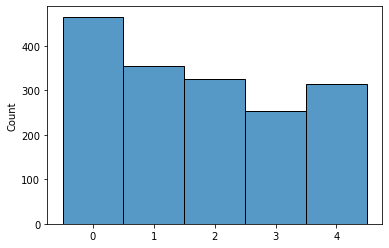

In [19]:
sns.histplot(labels,binrange=(-0.5,4.5),bins=5)

Görselleştirme için boyut sayısını PCA ile 2'ye düşürelim

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [21]:
X_pca = pca.fit_transform(X)

In [22]:
X_pca

array([[ 2.72939570e+03,  2.93673112e+01],
       [ 2.88323904e+04, -1.86580355e+01],
       [-3.27306062e+04,  1.54377380e+01],
       ...,
       [ 1.58439338e+03,  9.48730266e+00],
       [-4.19660887e+03, -9.86305703e+00],
       [-2.39726091e+04, -1.05817800e+01]])

In [23]:
pca_scaler = StandardScaler()
X_pca_transformed = pca_scaler.fit_transform(X_pca)

In [24]:
X_pca_transformed

array([[ 0.07242919,  2.61852958],
       [ 0.76511692, -1.66363946],
       [-0.86856276,  1.37650237],
       ...,
       [ 0.04204459,  0.84593317],
       [-0.11136421, -0.87943722],
       [-0.63615429, -0.94352199]])

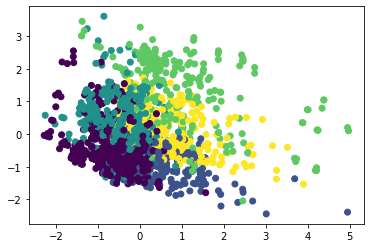

In [25]:
plt.scatter(x=X_pca_transformed[:,0],y=X_pca_transformed[:,1],c=labels)

Individual cluster analysis

In [26]:
X['Label'] = labels

In [27]:
clusters = []
clusters.append(X[X['Label']==0])
clusters.append(X[X['Label']==1])
clusters.append(X[X['Label']==2])
clusters.append(X[X['Label']==3])
clusters.append(X[X['Label']==4])

Cluster EDA

In [28]:
cats = X.columns

In [29]:
clusters[0].describe().round(0)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
count,466.0,466.0,466.0,466.0,466.0,466.0,466.0,466.0
mean,1.0,1.0,30.0,1.0,96978.0,0.0,0.0,0.0
std,0.0,0.0,8.0,0.0,22533.0,0.0,0.0,0.0
min,0.0,1.0,18.0,1.0,35832.0,0.0,0.0,0.0
25%,1.0,1.0,25.0,1.0,81976.0,0.0,0.0,0.0
50%,1.0,1.0,28.0,1.0,98832.0,0.0,0.0,0.0
75%,1.0,1.0,34.0,1.0,112864.0,1.0,0.0,0.0
max,1.0,1.0,59.0,2.0,181003.0,1.0,1.0,0.0


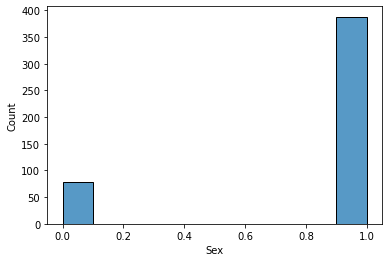

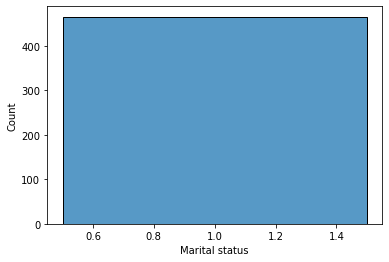

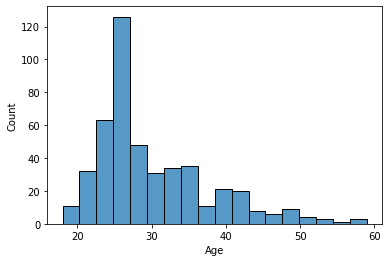

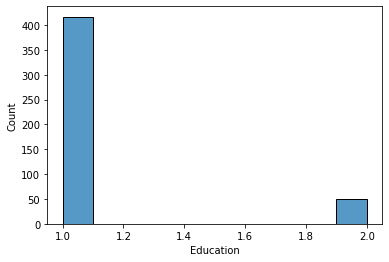

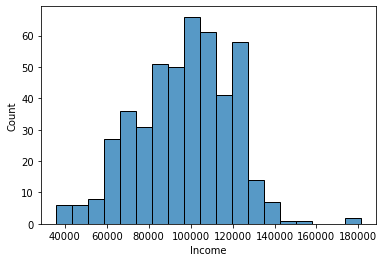

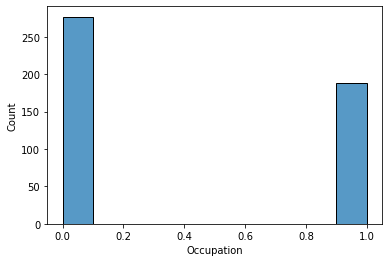

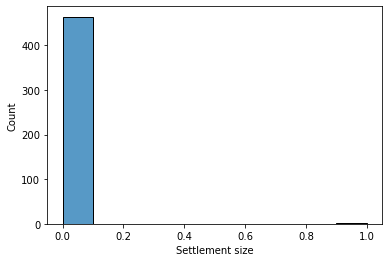

In [30]:
for cat in cats:
    if cat == 'Label': continue
    fig, ax1 = plt.subplots()
    sns.histplot(clusters[0][cat])

In [31]:
clusters[1].describe().round(0)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,1.0,1.0,28.0,1.0,127179.0,1.0,1.0,1.0
std,0.0,0.0,5.0,0.0,29544.0,0.0,1.0,0.0
min,0.0,0.0,18.0,1.0,88475.0,0.0,0.0,1.0
25%,0.0,1.0,24.0,1.0,106839.0,1.0,1.0,1.0
50%,1.0,1.0,27.0,1.0,118400.0,1.0,1.0,1.0
75%,1.0,1.0,31.0,1.0,140635.0,1.0,2.0,1.0
max,1.0,1.0,42.0,1.0,308491.0,2.0,2.0,1.0


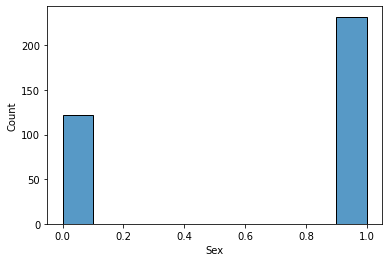

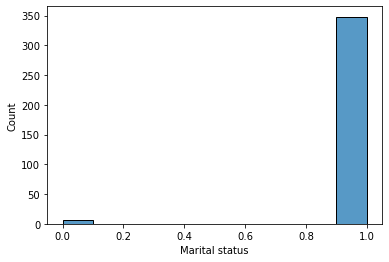

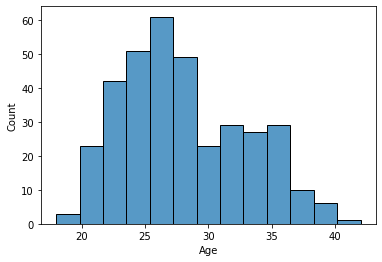

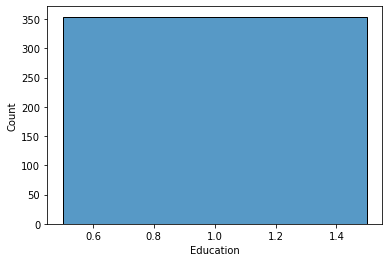

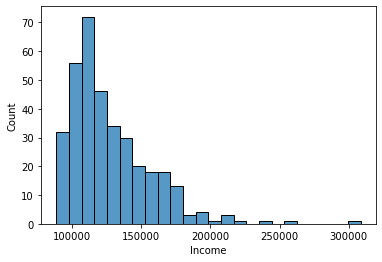

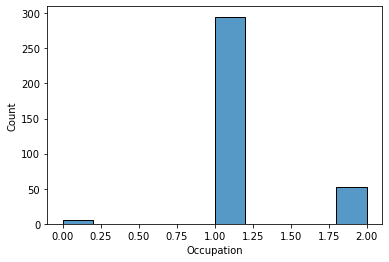

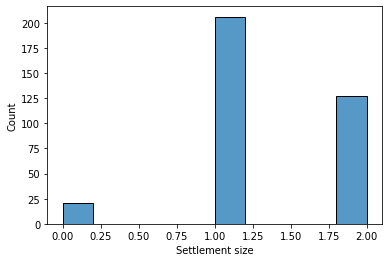

In [32]:
for cat in cats:
    if cat == 'Label': continue
    fig, ax1 = plt.subplots()
    sns.histplot(clusters[1][cat])

In [33]:
clusters[2].describe().round(0)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
count,325.0,325.0,325.0,325.0,325.0,325.0,325.0,325.0
mean,0.0,0.0,40.0,1.0,101896.0,0.0,0.0,2.0
std,0.0,0.0,9.0,0.0,20998.0,0.0,0.0,0.0
min,0.0,0.0,19.0,1.0,36760.0,0.0,0.0,2.0
25%,0.0,0.0,35.0,1.0,85569.0,0.0,0.0,2.0
50%,0.0,0.0,39.0,1.0,103696.0,0.0,0.0,2.0
75%,1.0,0.0,44.0,1.0,116137.0,1.0,0.0,2.0
max,1.0,0.0,74.0,2.0,156431.0,1.0,1.0,2.0


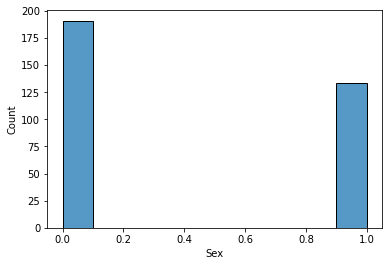

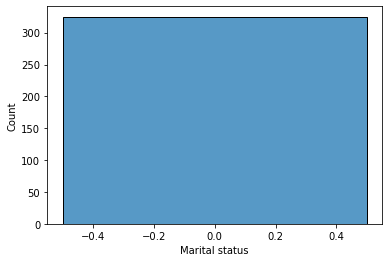

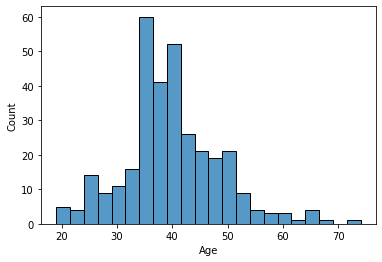

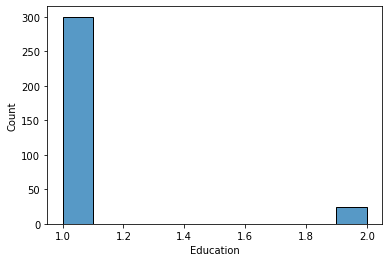

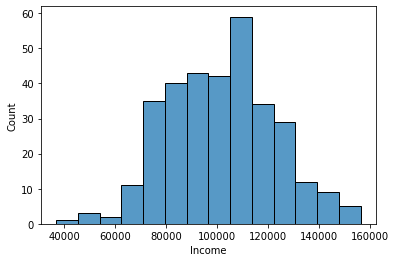

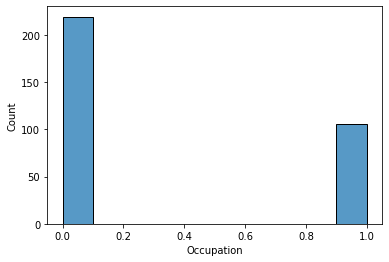

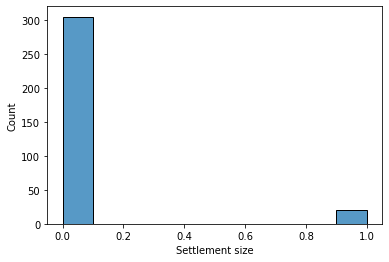

In [34]:
for cat in cats:
    if cat == 'Label': continue
    fig, ax1 = plt.subplots()
    sns.histplot(clusters[2][cat])

In [35]:
clusters[3].describe().round(0)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
count,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0
mean,0.0,1.0,56.0,2.0,158894.0,1.0,1.0,3.0
std,1.0,0.0,10.0,0.0,44762.0,1.0,1.0,0.0
min,0.0,0.0,25.0,2.0,69487.0,0.0,0.0,3.0
25%,0.0,0.0,47.0,2.0,129556.0,1.0,1.0,3.0
50%,0.0,1.0,57.0,2.0,148675.0,1.0,1.0,3.0
75%,1.0,1.0,64.0,2.0,172909.0,2.0,2.0,3.0
max,1.0,1.0,76.0,3.0,309364.0,2.0,2.0,3.0


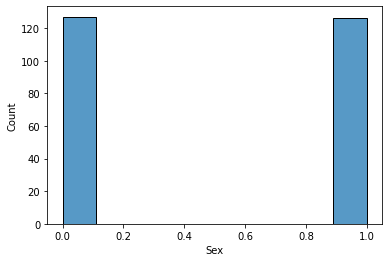

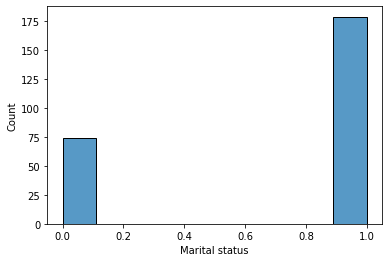

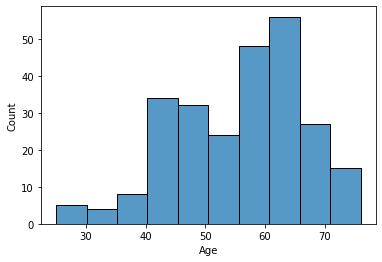

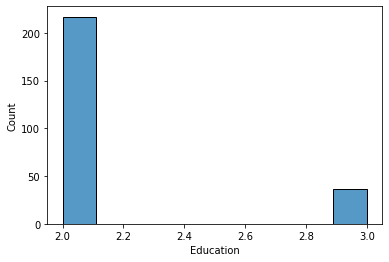

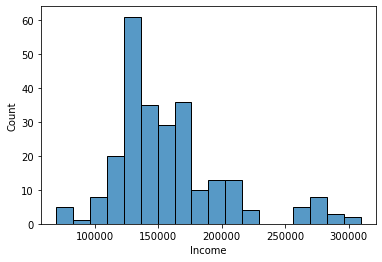

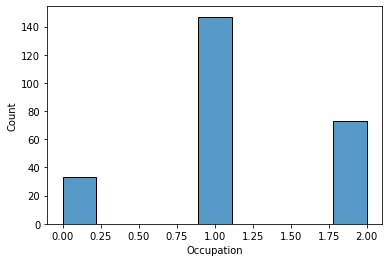

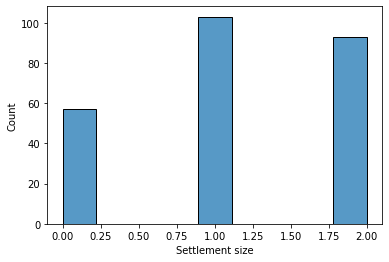

In [36]:
for cat in cats:
    if cat == 'Label': continue
    fig, ax1 = plt.subplots()
    sns.histplot(clusters[3][cat])

In [37]:
clusters[4].describe().round(0)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
count,315.0,315.0,315.0,315.0,315.0,315.0,315.0,315.0
mean,0.0,0.0,41.0,1.0,143984.0,1.0,1.0,4.0
std,0.0,0.0,7.0,0.0,31489.0,0.0,1.0,0.0
min,0.0,0.0,30.0,1.0,82398.0,0.0,0.0,4.0
25%,0.0,0.0,36.0,1.0,121356.0,1.0,1.0,4.0
50%,0.0,0.0,40.0,1.0,139198.0,1.0,2.0,4.0
75%,0.0,0.0,46.0,1.0,158483.0,2.0,2.0,4.0
max,1.0,0.0,58.0,1.0,268906.0,2.0,2.0,4.0


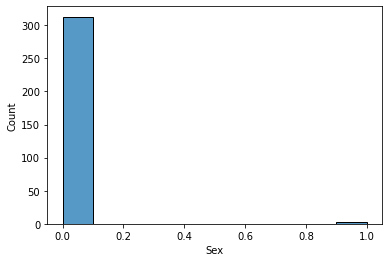

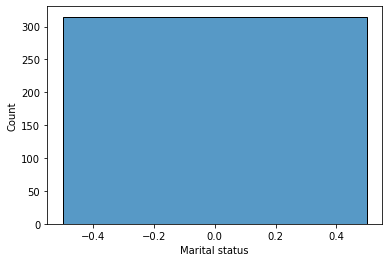

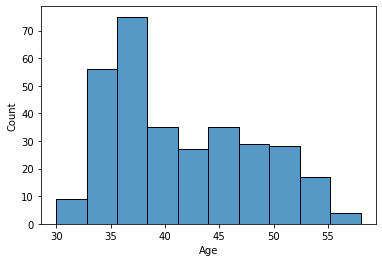

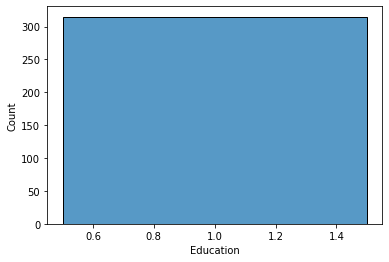

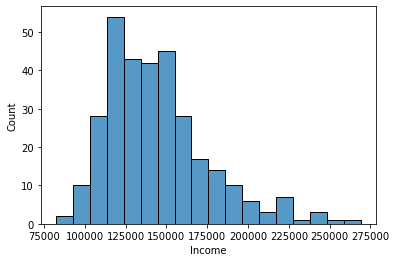

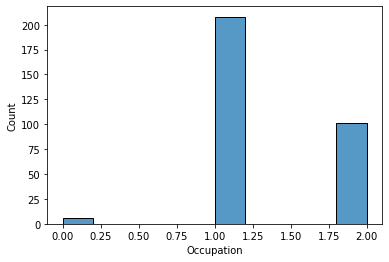

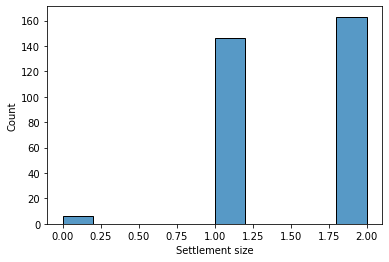

In [38]:
for cat in cats:
    if cat == 'Label': continue
    fig, ax1 = plt.subplots()
    sns.histplot(clusters[4][cat])